In [1]:
import mlflow.sklearn

In [2]:
mlflow.set_tracking_uri("../../deployment/mlruns/")

In [3]:
mlflow.set_experiment(experiment_name = "recommendation_model")

<Experiment: artifact_location='/home/alumni/Programación/Proyectos/Data_Science/Recommendation_Model/src/notebooks/../../deployment/mlruns/487372267701072284', creation_time=1740506977170, experiment_id='487372267701072284', last_update_time=1740506977170, lifecycle_stage='active', name='recommendation_model', tags={}>

In [4]:
import pandas as pd

In [5]:
data = pd.read_csv("../datasets/processed_data/processedData.csv", sep = ",")
data

,userId,rating,title,imdbId
0,1,4.0,Toy Story,114709
1,5,4.0,Toy Story,114709
2,7,4.5,Toy Story,114709
3,15,2.5,Toy Story,114709
4,17,4.5,Toy Story,114709
...,...,...,...,...
100831,610,2.5,Bloodmoon,118745
100832,610,4.5,Sympathy for the Underdog,66806
100833,610,3.0,Hazard,798722
100834,610,3.5,Blair Witch,1540011


In [6]:
features_df = pd.read_csv("../datasets/processed_data/featuresDataset.csv", sep = ",")
features_df 

,imdbId,title,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,...,1930s,1940s,1950s,1960s,1970s,1980s,1990s,2000s,2010s,unknown
0,2614684,'71,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,False,False,True,False
1,424755,'Hellboy': The Seeds of Creation,0,1,1,0,0,1,0,1,...,False,False,False,False,False,False,False,True,False,False
2,90557,'Round Midnight,0,0,0,0,0,0,0,0,...,False,False,False,False,False,True,False,False,False,False
3,355987,'Salem's Lot,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,False,True,False,False
4,118523,'Til There Was You,0,0,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9443,120907,eXistenZ,0,1,0,0,0,0,0,0,...,False,False,False,False,False,False,True,False,False,False
9444,295701,xXx,0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
9445,329774,xXx: State of the Union,0,1,0,0,0,0,1,0,...,False,False,False,False,False,False,False,True,False,False
9446,92086,¡Three Amigos!,0,0,0,0,0,1,0,0,...,False,False,False,False,False,True,False,False,False,False


In [7]:
movies = features_df[["title","imdbId"]]
features_df.drop(columns=["title","imdbId"], axis = 1, inplace = True)
movies = pd.DataFrame(movies)

In [8]:
from funpymodeling import status, freq_tbl, profiling_num

In [9]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,userId,0,0.0,0,0.0,610,int64
1,rating,0,0.0,0,0.0,10,float64
2,title,0,0.0,0,0.0,9433,object
3,imdbId,0,0.0,0,0.0,9724,int64


In [10]:
status(features_df)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,(no genres listed),0,0.0,9414,0.996401,2,int64
1,Action,0,0.0,7667,0.811494,2,int64
2,Adventure,0,0.0,8217,0.869708,2,int64
3,Animation,0,0.0,8837,0.935330,2,int64
4,Children,0,0.0,8800,0.931414,2,int64
5,Comedy,0,0.0,5750,0.608594,2,int64
6,Crime,0,0.0,8267,0.875000,2,int64
7,Documentary,0,0.0,9008,0.953429,2,int64
8,Drama,0,0.0,5178,0.548052,2,int64
9,Fantasy,0,0.0,8693,0.920089,2,int64


As we are going to use a technique called collaborative filtering to generate recommendations for users, we need to transform our data into a user-item("utility) matrix.

In this matrix, rows represent users and columns represent movies. Each value for each element of the matrix represent the rating the user gave that movie.

In this type of technique we do not require any information about the users or the movies in order to generate the recommendations.

### Matrix creation

Apart from creating the matrix, we are going to create four mapper directories:
- **userId_mapper**: maps user id to user index
- **movieTitle_mapper**: maps movie id to user index
- **userId_inv_mapper**: maps user index to user id
- **movieTitle_inv_mapper**: maps movie index to movie id

These dictionaries are importante because they map which column/row of the utility matrix corresponds to which user/movie id 

In [11]:
from scipy.sparse import csr_matrix
import numpy as np

The following code block generates a *sparse matrix* from the `data` dataframe

In [12]:
def create_matrix(df):
    """
    Creates a sparse matrix from a dataframe

    Args:
        df: pandas dataframe

    Returns:
        matrix: sparse matrix
        userId_mapper: dictionary that maps user id´s to user indices
        imdbId_mapper: dictionary that maps imdb id´s to imdb indices
        userId_inv_mapper: dictionary that maps user indices to user id´s
        imdbId_inv_mapper: dictionary that maps imdb indices to imdb id´s
    
    """
    U = df["userId"].nunique()
    M = df["imdbId"].nunique()

    userId_mapper = dict(zip(np.unique(df["userId"]), list(range(U))))
    imdbId_mapper = dict(zip(np.unique(df["imdbId"]), list(range(M))))

    userId_inv_mapper = dict(zip(list(range(U)), np.unique(df["userId"])))
    imdbId_inv_mapper = dict(zip(list(range(M)), np.unique(df["imdbId"])))

    user_index = [userId_mapper[i] for i in df["userId"]]
    imdbId_index = [imdbId_mapper[i] for i in df["imdbId"]]

    matrix = csr_matrix((df["rating"], (user_index, imdbId_index)), shape=(U,M))

    return matrix, userId_mapper, imdbId_mapper, userId_inv_mapper, imdbId_inv_mapper

matrix, userId_mapper, imdbId_mapper, userId_inv_mapper, imdbId_inv_mapper = create_matrix(data)

In [13]:
matrix.shape

(610, 9724)

Our matrix contains 610 users and 9724 movies. 

In [14]:
userId_mapper

{1: 0,
 2: 1,
 3: 2,
 4: 3,
 5: 4,
 6: 5,
 7: 6,
 8: 7,
 9: 8,
 10: 9,
 11: 10,
 12: 11,
 13: 12,
 14: 13,
 15: 14,
 16: 15,
 17: 16,
 18: 17,
 19: 18,
 20: 19,
 21: 20,
 22: 21,
 23: 22,
 24: 23,
 25: 24,
 26: 25,
 27: 26,
 28: 27,
 29: 28,
 30: 29,
 31: 30,
 32: 31,
 33: 32,
 34: 33,
 35: 34,
 36: 35,
 37: 36,
 38: 37,
 39: 38,
 40: 39,
 41: 40,
 42: 41,
 43: 42,
 44: 43,
 45: 44,
 46: 45,
 47: 46,
 48: 47,
 49: 48,
 50: 49,
 51: 50,
 52: 51,
 53: 52,
 54: 53,
 55: 54,
 56: 55,
 57: 56,
 58: 57,
 59: 58,
 60: 59,
 61: 60,
 62: 61,
 63: 62,
 64: 63,
 65: 64,
 66: 65,
 67: 66,
 68: 67,
 69: 68,
 70: 69,
 71: 70,
 72: 71,
 73: 72,
 74: 73,
 75: 74,
 76: 75,
 77: 76,
 78: 77,
 79: 78,
 80: 79,
 81: 80,
 82: 81,
 83: 82,
 84: 83,
 85: 84,
 86: 85,
 87: 86,
 88: 87,
 89: 88,
 90: 89,
 91: 90,
 92: 91,
 93: 92,
 94: 93,
 95: 94,
 96: 95,
 97: 96,
 98: 97,
 99: 98,
 100: 99,
 101: 100,
 102: 101,
 103: 102,
 104: 103,
 105: 104,
 106: 105,
 107: 106,
 108: 107,
 109: 108,
 110: 109,
 111: 11

In order to know if using collaborative filtering is a good idea, we need to check the matrix sparsity with the next formula: 
$$
\text{sparsity} = \frac{\#\text{ratings}}{\#\text{elements}}
$$


In [15]:
n_elements = matrix.shape[0] * matrix.shape[1]
n_ratings = matrix.nnz
sparsity = n_ratings / n_elements

In [16]:
round(sparsity*100,2)

1.7

Only 1.7% of cells in our user-item matrix is populated with ratings.

It is considered that our matrix sparsity should be no lower than 0.5% in order to generate decent results.

### Item-Item recommendations with KNN

We are going to use KNN in order to see the recommendations based only on user-item ratings.

In [17]:
from sklearn.neighbors import NearestNeighbors

def find_similar_movies(movie_id, matrix, movie_mapper, movie_inv_mapper, k, metric="cosine"):
    """
    Find k-nearest neigbours for a given movie id.

    Args:
        movie_id: id of the movie of interest
        matrix: use-item utility matrix
        k: number of similar movies to retrieve
        metric: distance metric for knn calculations

    Returns:
        neigbpour_ids: a list of k similar movie ID`s to the one of interest.
    """
    matrix = matrix.T
    neighbours_ids = []

    movie_index = movie_mapper[movie_id]
    movie_vec = matrix[movie_index]
  

    knn = NearestNeighbors(n_neighbors=k+1,algorithm="brute",metric=metric)
    knn.fit(matrix)

    if isinstance(movie_vec, (np.ndarray)):
            movie_vec = movie_vec.reshape(1,-1)
    neighbours = knn.kneighbors(movie_vec, return_distance=False)

    for i in range(0,k):
        n = neighbours.item(i)
        neighbours_ids.append(movie_inv_mapper[n])
    neighbours_ids.pop(0)

    return neighbours_ids

In [18]:
similar_movies = find_similar_movies(75148, matrix, imdbId_mapper, imdbId_inv_mapper, k = 10)
similar_movies

[88247, 93870, 63442, 79817, 94226, 73195, 80455, 55928, 91042]

The  `find_similar_movies()` function returns a list of movies **ID\`s** that are similar to movie of our interest.  
When doing the recommendations, we want to show to the user the movie´s title, so in order to do it I am going to make a dictionary that maps the **imbd ID´s** to **movies titles**. 

In [19]:
movie_titles = dict(zip(data["imdbId"], data["title"]))

movie_id = 75148

similar_movies = find_similar_movies(movie_id, matrix, imdbId_mapper, imdbId_inv_mapper, k = 10)
similar_movies

print(f"Because you liked \"{movie_titles[movie_id]}\", you should watch the following movies:")
for j in similar_movies:
    print(f"- {movie_titles[j]}")


Because you liked "Rocky", you should watch the following movies:
- The Terminator
- RoboCop
- Planet of the Apes
- Rocky II
- The Untouchables
- Jaws
- The Blues Brothers
- Dr. No
- Ferris Bueller's Day Off


Now we can see the titles of the 9 movies that are most similar to Rocky. Some movies are from the same the decade such as **"The Terminator"** and **"RoboCop"**

We can also choose another knn distance metric instead of *"cosine"*.  
Lets try the *"euclidean"* one.

In [20]:
similar_movies = find_similar_movies(movie_id, matrix, imdbId_mapper, imdbId_inv_mapper, metric="euclidean",k = 10)
similar_movies

print(f"Because you liked \"{movie_titles[movie_id]}\", you should watch the following movies:")
for j in similar_movies:
    print(f"- {movie_titles[j]}")

Because you liked "Rocky", you should watch the following movies:
- Rocky II
- Dr. No
- Rocky III
- Rocky IV
- First Blood (Rambo: First Blood)
- RoboCop
- Planet of the Apes
- Escape from New York
- The Manchurian Candidate


Collaborative filtering relies solely on user-item interactions within the utility matrix.

So the issue when using collaborative filtering is that brand new users or items with no interactions get excluded from the recommendation system.

This is called the ***"Cold-start Problem"***.

### Handling Cold-start Problem with Content-Based Filtering

Content-based filtering is a way to handle the cold-start problem by generating recommendations based on user and item features.    

In this case, I am going to use item features such as the **genres** and in what **decade** was released the movie. 

To build our *item-item recommender* we are going to use a similarity metric called ***cosine similarity***

**Cosine similarity** looks at the angle between two vectors, *A* and *B*. The smaller the cosine angle, the higher the degree of similarity between *A* and *B*.  
You can calculate the similarity between A and B with this equation:
$$ \cos(\theta) = \frac{A \cdot B}{\|A\|\|B\|} $$

In order words, the matrix is going to have values between 0 and 1 which represent the degree of similarity between movies along the x and y axes.

In [21]:
from sklearn.metrics.pairwise import cosine_similarity

In [22]:
cosine_sim = cosine_similarity(features_df,features_df)
cosine_sim

array([[1.        , 0.18257419, 0.25819889, ..., 0.4472136 , 0.        ,
        0.        ],
       [0.18257419, 1.        , 0.        , ..., 0.40824829, 0.23570226,
        0.23570226],
       [0.25819889, 0.        , 1.        , ..., 0.        , 0.33333333,
        0.33333333],
       ...,
       [0.4472136 , 0.40824829, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.23570226, 0.33333333, ..., 0.        , 1.        ,
        0.33333333],
       [0.        , 0.23570226, 0.33333333, ..., 0.        , 0.33333333,
        1.        ]])

We can see that the values can go from 0 up to 1.

In [23]:
cosine_sim.shape

(9448, 9448)

We got a cosine similarity matrix of shape (*n*<sub>movies</sub>, *n*<sub>movies</sub>)

How many times we wrote the title of a movie and we misspelled it? So in order to avoid future problems, I am going to use **fuzywuzzy**´s matching algorithm to find the most similar title to the user-inputted string.

In [24]:
from fuzzywuzzy import process

def movie_finder(title):
    """
    Finds the closest string match to the parameter title

    Args:
        title: Movie title string

    Returns:
        closest_match[0]: Returns the closest match, position 0
    """
    all_titles = movies["title"].tolist()
    closest_match = process.extractOne(title,all_titles)
    return closest_match[0]

/home/alumni/Programación/Proyectos/Data_Science/DataScience/lib/python3.11/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [25]:
movie_finder("starr warrs")

'Star Wars: Episode IV - A New Hope'

As you can see I wrote a mispelled and incompleted title, and it found its closest match.

Now we are going to create a dictionary that maps movies titles to movies index.  
Basically if we try to search for a movie title, it will give us its index in **movies dataframe**.

In [26]:
movie_idx = dict(zip(movies["title"],list(movies.index)))
idx = movie_idx["Rocky"]
idx

6004

Now lets create a create a function that gives us recommendations using *content-based filtering*.

In [27]:
def get_recommendations(movie_title, n_recommendations = 5):
    """
    Prints the n most similar recommendations for certain movie

    Args:
        movie_title: 
        n_recommendations:
    """
    title = movie_finder(movie_title)
    idx = movie_idx[title]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key = lambda x:x[1], reverse = True)
    sim_scores = sim_scores[1:(n_recommendations+1)]
    similar_movies = [i[0] for i in sim_scores]
    print(f"If you liked {title}, you should watch:")
    print(movies['title'].iloc[similar_movies])

In [28]:
get_recommendations("Rocky (1976)", 5)

If you liked Rocky, you should watch:
273       A Woman Under the Influence
358                           Airport
359                       Airport '77
706       Autumn Sonata (Höstsonaten)
1039    Billy Jack Goes to Washington
Name: title, dtype: object


If we dive deep into these movies, we will notice that this movies were released in the 1970s decade.  
So how about we remove the decades columns and use ***cosine similarity*** only with the *genres*.

In [29]:
genres_df = features_df.iloc[:,:20]
genres_df

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0
1,0,1,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9443,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
9444,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9445,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0
9446,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [30]:
cosine_sim = cosine_similarity(genres_df, genres_df)
cosine_sim

array([[1.        , 0.2236068 , 0.35355339, ..., 0.57735027, 0.        ,
        0.        ],
       [0.2236068 , 1.        , 0.        , ..., 0.25819889, 0.31622777,
        0.31622777],
       [0.35355339, 0.        , 1.        , ..., 0.        , 0.        ,
        0.5       ],
       ...,
       [0.57735027, 0.25819889, 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.31622777, 0.        , ..., 0.        , 1.        ,
        0.5       ],
       [0.        , 0.31622777, 0.5       , ..., 0.        , 0.5       ,
        1.        ]])

In [31]:
get_recommendations("Rocky", 5)

If you liked Rocky, you should watch:
21                100 Streets
29    11'09"01 - September 11
34           12 Years a Slave
39                   13 Hours
81                    28 Days
Name: title, dtype: object


### Dimensionality Reduction with Matrix Factorization

Matrix Factorization is a linear algebra technique that can help us discover latent features (*k*) underlying the interactions between users and movies.  
It is very useful for very sparse data and can enhance the quality of the recommendations.

These latent features give a more compact representation of user tastes and item descriptions.  
  
The algorithm works by factorizing the original user-item matrix into two factor matrices:
- user-factor matrix (n_users, *k*)
- item-factor matrix (*k*, n_items)

We can´t interpret what each latent feature k represents, however, we could imagine that one latent feature may represent users that like anime movies, while another one may represent action movies from the 70s.

In [32]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components =20, n_iter =10)
movie_embeddings = svd.fit_transform(matrix.T)
movie_embeddings.shape

(9724, 20)

We have (*n*<sub>movies</sub>, *n*<sub>components</sub>).  
More components, less compressed.
At some point more compact can make us lose information.

In [33]:
similar_movies = find_similar_movies(movie_id, movie_embeddings.T, imdbId_mapper, imdbId_inv_mapper, metric="cosine",k = 10)
similar_movies

print(f"Because you liked \"{movie_titles[movie_id]}\", you should watch the following movies:")
for j in similar_movies:
    print(f"- {movie_titles[j]}")

Because you liked "Rocky", you should watch the following movies:
- Goldfinger
- The Untouchables
- Jaws
- Ghostbusters (a.k.a. Ghost Busters)
- Airplane!
- A Few Good Men
- Close Encounters of the Third Kind
- Crocodile Dundee
- Die Hard


## Advanced Models

Up to this point we tried basic models in order to make recommendations with small datasets. But what happens when we want to deploy the model?, we need it to be as fast as possible, furthermore, what happens when we have large datasets?, we need a model that can withstand large datasets.

That´s why I am going to use **FAISS** and **Annoy** libraries to observe different outputs and decide which one I am going to use for the API.

#### **FAISS**

**FAISS** (Facebook AI Similarity Search) is a library for efficient similarity search and clustering of dense vectors, in other words, high-performance similarity search for large scale datasets. Also, it has GPU/CPU support.

<u>Its key features are:</u>
- **High Performance on CPUs and GPUs**  

- **Multiple Index Types:** 
    - I used IndexFlatL2: Exact search using L2 (Euclidean) distance.
- **Support for quantization:**   
  Reduces memory usage by representing vectors with fewer bits, with controlled loss in accuracy

<u>To know more about this library, go to this link:</u>  
https://github.com/facebookresearch/faiss

Im going to start using **FAISS** with the Collaborative Filtering and Matrix Factorization techniques from before.

In [34]:
import faiss

In [35]:
movie_embeddings = movie_embeddings.astype("float32")

In [36]:
faiss.normalize_L2(movie_embeddings)

In [37]:
d = movie_embeddings.shape[1]
index = faiss.IndexFlatL2(d)
index.add(movie_embeddings)

In [38]:
def get_faiss_recommendations(title, embeddings, faiss_index, k=5):
    movie_title = movie_finder(title)
    movie_id = movie_idx[movie_title]
    query = embeddings[movie_id].reshape(1,-1)
    distances, indices = faiss_index.search(query,k=k+1)
    print(f"If you liked {movie_title}, you should watch: ")
    ids = indices[0].tolist()
    if movie_id in ids:
        ids.remove(movie_id)
    faiss_indices = ids[:k]
    return movie_id, faiss_indices

In [39]:
_, sim_ids = get_faiss_recommendations("Rambo", movie_embeddings, index, 7)
print(movies["title"].iloc[sim_ids])

If you liked First Blood (Rambo: First Blood), you should watch: 
4429    Love and Other Catastrophes
3321                      Helvetica
2990             Gintama: The Movie
4251                    Let It Ride
2287                       Due Date
3357       High Heels and Low Lifes
2486     Exit Through the Gift Shop
Name: title, dtype: object


And now with content-based filtering

In [40]:
features = features_df.values.astype("float32")
features

array([[0., 1., 0., ..., 0., 1., 0.],
       [0., 1., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [41]:
features.shape

(9448, 33)

Now we use *PCA (Principal Component Analysis)*, which is a statistical technique used for dimensionality reduction and feature extraction.  

In [42]:
from sklearn.decomposition import PCA

pca_full = PCA()
pca_full.fit_transform(features)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
threshold = 0.95
n_components = np.argmax(cumulative_variance >= threshold) + 1
pca = PCA(n_components=n_components)
features_dense = pca.fit_transform(features)

In [43]:
features_dense.shape

(9448, 21)

In [44]:
dimension = features_dense.shape[1]
faiss_index = faiss.IndexFlatL2(dimension)
faiss_index.add(features_dense)

In [45]:
_, sim_ids = get_faiss_recommendations("Rambo", features_dense, faiss_index, 7)
print(movies["title"].iloc[sim_ids])

If you liked First Blood (Rambo: First Blood), you should watch: 
6073            Runaway Train
7978       The Mosquito Coast
267          A View to a Kill
2725       For Your Eyes Only
4274          Licence to Kill
5089    Never Say Never Again
5237                Octopussy
Name: title, dtype: object


Finally, lets do a *scatter plot* for the Faiss index


In [46]:
import matplotlib.pyplot as plt

def get_plot(embeddings, movie_title, index):
    rec_indices=[]
    query_idx , rec_indices = get_faiss_recommendations(movie_title,embeddings, index, 5)
    
    pca=PCA(n_components=2)
    embeddings_2d = pca.fit_transform(embeddings)

    fig, ax=plt.subplots(figsize=(10,8))
    ax.scatter(embeddings_2d[:,0],embeddings_2d[:,1],color="lightgray",label="Movies",alpha=0.6, s=40)
    ax.scatter(embeddings_2d[query_idx,0],embeddings_2d[query_idx,1], marker='*', s=200,color="red",label=f"Query: {movie_title}")
    ax.scatter(embeddings_2d[rec_indices,0],embeddings_2d[rec_indices,1],color="blue",s=80,label="FAISS neighbors")
    ax.set_xlabel('PCA Component 1')
    ax.set_ylabel('PCA Component 2')
    ax.set_title(f"FAISS Recommendations for {movie_title} Scatter Plot")
    ax.legend()


If you liked Shrek, you should watch: 


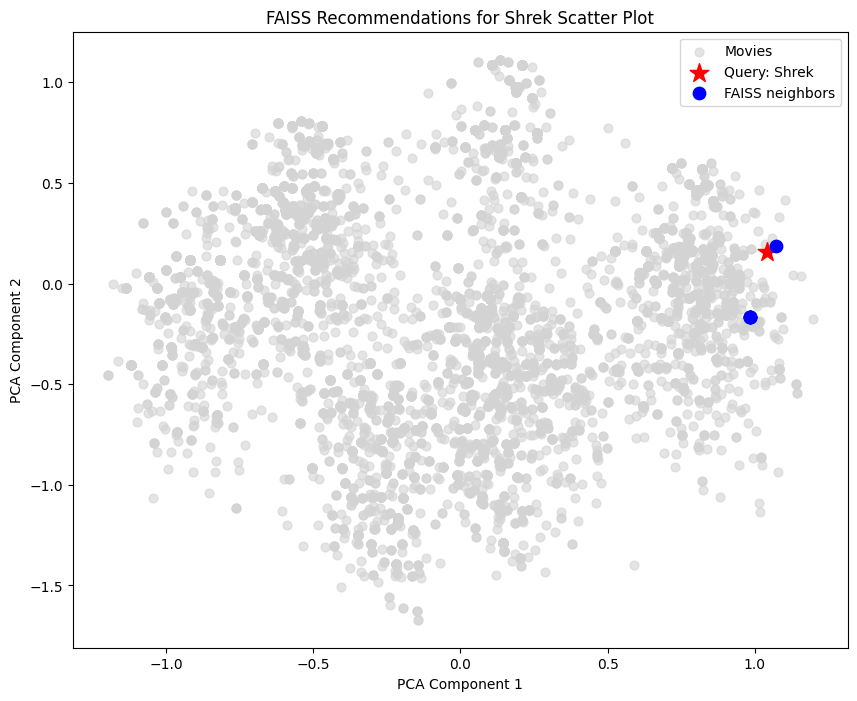

In [47]:
get_plot(features_dense,"Shrek",faiss_index)

#### **Annoy**

**Annoy** (Approximate Nearest Neighbors Oh Yeah) is a library to search for points in space that are close to a given query point. Its purpose is to do efficient *Approximate Nearest Neighbors (ANN)* search for medium-sized datasets. It is ideal to use it for large-scale recommendation systems.

<u>Its key features are:</u>
- **Indexing with Trees:**  
  Annoy builds a forest of binary trees by recursively partitioning the high dimensional space using random hyperplanes.  
  
- **Static and Read-Only indexes:**  
  Once built, the index can be saved to disk and memory-mapped, allowing many processes to share it without re-building.  
  
- **Multiple Distance Metrics:**  
  Support Angular (related to cosine similarity), Euclidean, Manhattan, among others
- **Trade-Off between Accuracy and Speed:**  
  More number of trees means more accuracy at cost of build time and index size.

<u>To know more about this library, go to this link:</u>  
https://github.com/spotify/annoy?tab=readme-ov-file

In [48]:
from annoy import AnnoyIndex

In [49]:
dim = len(features_df.columns)
dim

33

In [50]:
annoy_metric = "angular"
annoy_index = AnnoyIndex(dim,annoy_metric)

for idx, vector in enumerate(features):
    annoy_index.add_item(idx,vector)

annoy_index.build(n_trees=25)

True

In [51]:
def get_similar_movies(movie_title, n_recommendations = 5):
    title = movie_finder(movie_title)
    print(f"Because you liked {title}, you should watch:")
    idx = movie_idx[title]

    similar_indices = annoy_index.get_nns_by_item(idx, n_recommendations)

    return movies['title'].iloc[similar_indices]

In [52]:
similar_movies = get_similar_movies("Rocky (1976)", 6)

print(f" {similar_movies}")

Because you liked Rocky, you should watch:
 92              3 Women (Three Women)
273       A Woman Under the Influence
358                           Airport
359                       Airport '77
706       Autumn Sonata (Höstsonaten)
1039    Billy Jack Goes to Washington
Name: title, dtype: object


Once we tried **Annoy** and we already used **Matrix Factorization** before, how about we use both in a Hybrid Model.

In [53]:
svd_full = TruncatedSVD()
svd_full.fit_transform(matrix.T)
cumulative_variance = np.cumsum(svd_full.explained_variance_ratio_)
n_components = np.argmax(cumulative_variance >= threshold) + 1

svd = TruncatedSVD(n_components=n_components)
embeddings = svd.fit_transform(matrix.T)
dim = n_components
annoy_index = AnnoyIndex(dim,annoy_metric)
for idx, embedding in enumerate(embeddings):
    annoy_index.add_item(idx,embedding)
annoy_index.build(10)

True

In [54]:
sim_movies = get_similar_movies("Rambo",n_recommendations=6)
print(sim_movies)

Because you liked First Blood (Rambo: First Blood), you should watch:
2048                              Desk Set
9303                        Without a Clue
3018                               Go Fish
541     And Now... Ladies and Gentlemen...
54             1984 (Nineteen Eighty-Four)
472                     American History X
Name: title, dtype: object


### Save models

Once we finished training our models we are going to save **FAISS** and **ANNOY** indexes to use it in our API/APP.

In [55]:
import pickle

In [56]:
faiss.write_index(faiss_index, "../index/faiss_index.bin")

In [57]:
annoy_index.save("../index/annoy_index.ann")

True

In [58]:
with open("../dictionaries/features_dense.pkl", "wb") as handle:
    pickle.dump(features_dense, handle, protocol = pickle.HIGHEST_PROTOCOL)

with open("../dictionaries/movie_idx.pkl", "wb") as handle:
    pickle.dump(movie_idx, handle, protocol = pickle.HIGHEST_PROTOCOL)

with open("../dictionaries/movies.pkl", "wb") as handle:
    pickle.dump(movies, handle, protocol = pickle.HIGHEST_PROTOCOL)

In [59]:
import json
annoy_config = {
    "dimension":int(dim),
    "metric": annoy_metric,
}
with open("../index/annoy_config.json","w") as handle:
    json.dump(annoy_config,handle,indent=4)

In [60]:
mlflow.sklearn.log_model(faiss_index,"faiss_model")

2025/03/17 00:36:45 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2025/03/17 00:36:49 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
